#### Import Library

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [26]:
df = pd.read_csv("D:\Projects\Sales_EDA_Dashboard\Data\Raw\Sales Data.csv")
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


#### Overview of dataset: columns, dtypes, non-null counts

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


#### Summary stats for numerical columns

In [28]:
df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


#### Count missing values per column

In [29]:
print(df.isnull().sum())

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


#### Show shape of dataset (rows, columns)

In [30]:
df.shape

(185950, 11)

#### Check for duplicate data

In [31]:
print(df.duplicated().sum())

0


#### Convert the data type for the Order Date column to datetime

In [32]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        185950 non-null  int64         
 1   Order ID          185950 non-null  int64         
 2   Product           185950 non-null  object        
 3   Quantity Ordered  185950 non-null  int64         
 4   Price Each        185950 non-null  float64       
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
 7   Month             185950 non-null  int64         
 8   Sales             185950 non-null  float64       
 9   City              185950 non-null  object        
 10  Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 15.6+ MB


#### Feature Engineering

In [33]:
# Sales = Quantity * Price
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

# Extract time features
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Hour'] = df['Order Date'].dt.hour
df['Weekday'] = df['Order Date'].dt.day_name()

In [34]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Year,Day,Weekday
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2019,30,Monday
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2019,29,Sunday
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,2019,12,Thursday
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019,22,Sunday
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019,18,Wednesday


#### Univariate Analysis

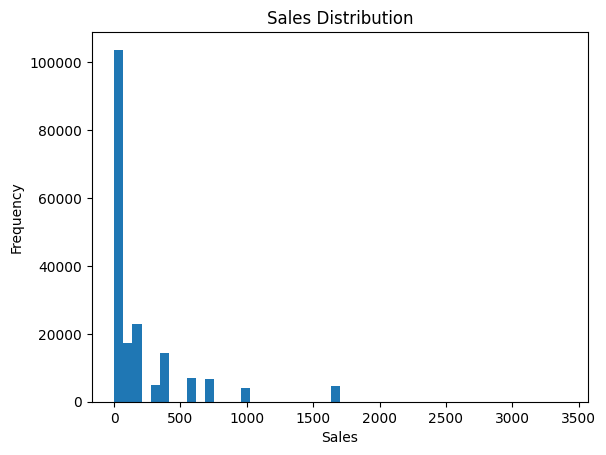

In [35]:
# Sales Distribution
plt.hist(df["Sales"], bins=50)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

The chart shows that sales come mainly from small orders, but a few large value orders can play a significant role in total revenue.

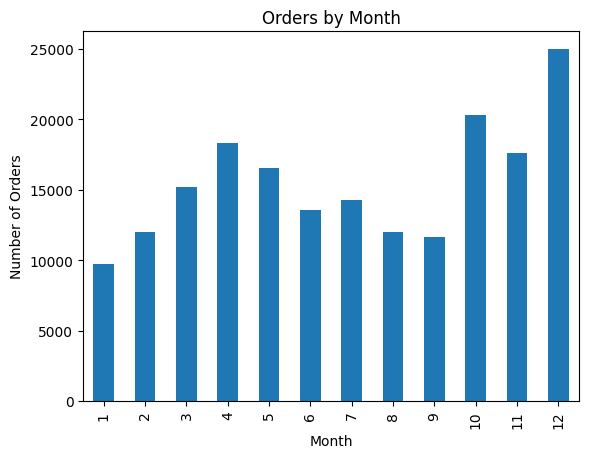

In [36]:
# Count Order by Month
df["Month"].value_counts().sort_index().plot(kind="bar")
plt.title("Orders by Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()

The chart shows that monthly sales are seasonal, with a sharp increase at the end of the year (December), and a low at the beginning of the year (January–February).

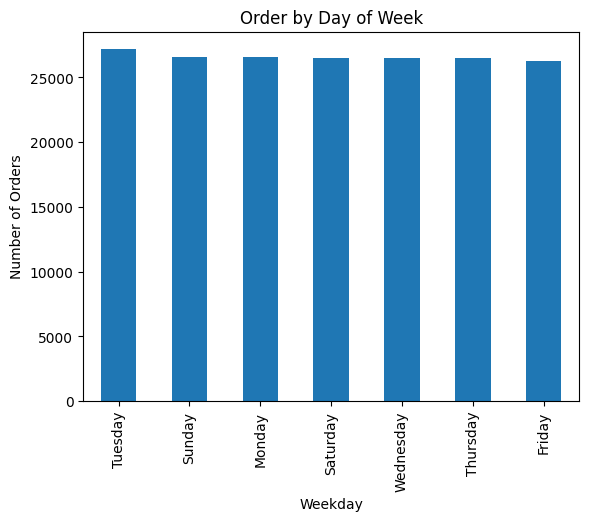

In [37]:
# Count Order by Day of Week
df["Weekday"].value_counts().plot(kind="bar")
plt.title("Order by Day of Week")
plt.xlabel("Weekday")
plt.ylabel("Number of Orders")
plt.show()

Orders are distributed fairly evenly throughout the week, with only Tuesday being slightly higher and Friday being slightly lower, demonstrating stable purchasing behavior by day.

#### Bivariate Analysis

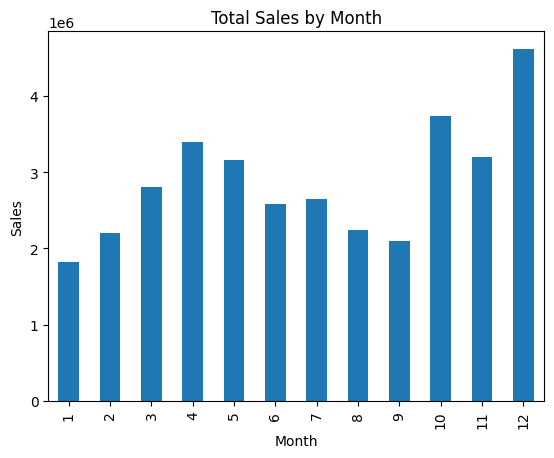

In [38]:
# Total Sales by Month
df.groupby('Month')['Sales'].sum().plot(kind='bar')
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

Businesses can focus their marketing campaigns on Q4 to take advantage of purchasing power.

At the same time, they should launch promotional programs to stimulate demand in January and September to grow during the low season.

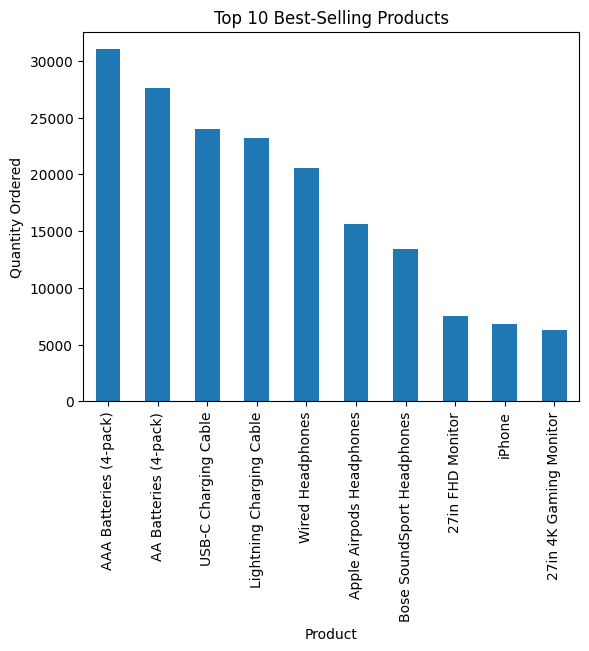

In [39]:
# Top best selling products
df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.show()

Cheap, essential accessories (batteries, cables, headphones) dominate the sales volume.

Large technology products (iPhones, monitors) have fewer orders but can bring in higher revenue (due to large order values).

Businesses should:

Promote cross-selling: recommend batteries and cables when customers buy iPhones, laptops, monitors.

Optimize inventory for cheap accessories because they sell continuously and quickly.

For expensive products, focus on upselling strategies and targeted marketing campaigns.

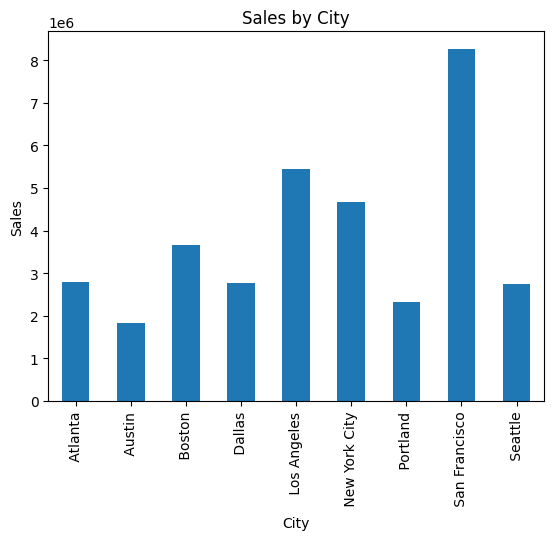

In [40]:
# Sales by City
df.groupby('City')['Sales'].sum().plot(kind='bar')
plt.title("Sales by City")
plt.xlabel("City")
plt.ylabel("Sales")
plt.show()

San Francisco has a distinct advantage → possibly due to:

High average income.

High demand for technology (Silicon Valley).

Large cities like LA, NYC, Boston are also potential markets → need to focus on marketing and logistics campaigns.

Smaller cities (Austin, Portland) still have revenue but much lower → should consider allocating marketing resources appropriately.

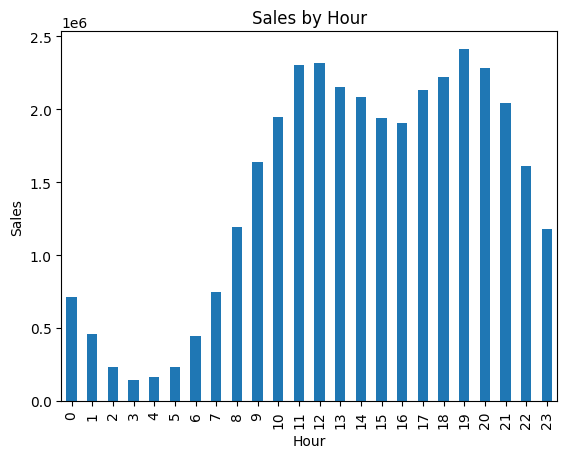

In [41]:
# Sales by Hour
df.groupby('Hour')['Sales'].sum().plot(kind='bar')
plt.title("Sales by Hour")
plt.xlabel("Hour")
plt.ylabel("Sales")
plt.show()

There are two golden hours for sales:

11am (before/after lunch break).

19:00–21:00 (after work).

This is the time when consumers tend to shop online the most.

Businesses can:

Promote online advertising and flash sales during these two hours.

Arrange customer service and operations personnel appropriately to handle peak orders.

#### Multivariate Analysis

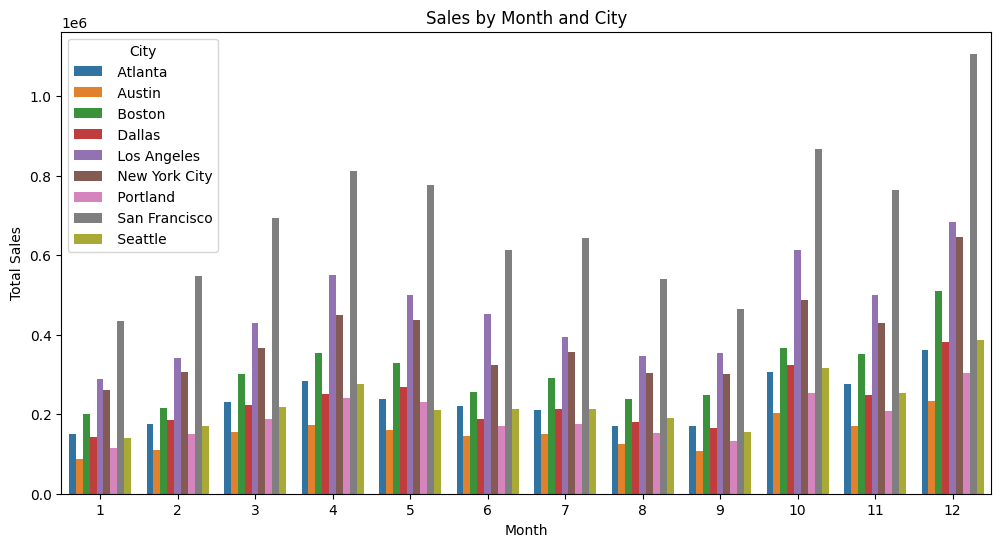

In [42]:
# Sales by Month and City
sales_month_city = df.groupby(['Month', 'City'])['Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=sales_month_city, x='Month', y='Sales', hue='City')
plt.title("Sales by Month and City")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(title="City")
plt.show()

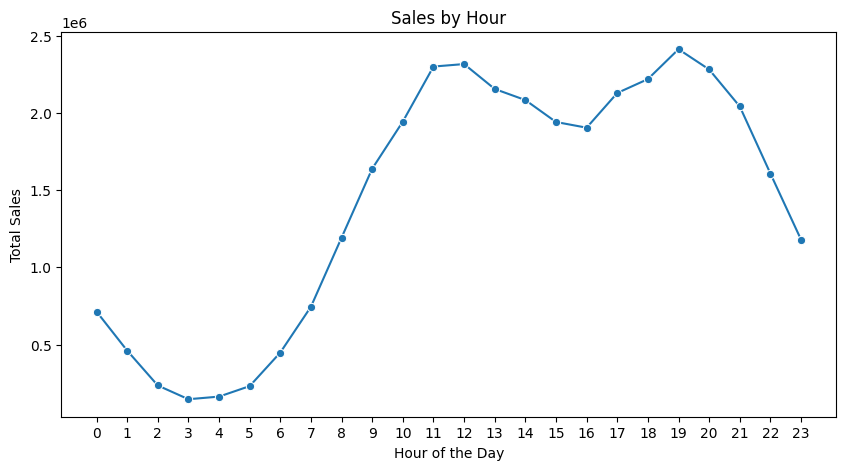

In [44]:
# Sales by Hour
sales_hour = df.groupby('Hour')['Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=sales_hour, x='Hour', y='Sales', marker='o')
plt.title("Sales by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales")
plt.xticks(range(0,24))
plt.show()

This chart shows that sales vary significantly by time of day, with two peak shopping times:

First peak: Around 11am to 1pm. This is likely the lunch break, when people have time to shop.

Second peak (highest): Around 6pm to 8pm. This is the time after work, when shopping demand is at its highest during the day.

In contrast, sales are very low at night and early in the morning, especially from around midnight to 6am.